# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from matplotlib import style
import glob


# Defining Path for further use in code

In [3]:

main_folder = './trafficsigns/'
Meta_folder = './trafficsigns/Meta/'
Train_images = './trafficsigns/train/'
Test_images = './trafficsigns/test/'
train_csv= './trafficsigns/train.csv'
test_csv = './trafficsigns/test.csv'
meta_csv = './trafficsigns/meta.csv'


# EDA

In [4]:
meta_data = pd.read_csv(meta_csv)
meta_data.head(3)

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29


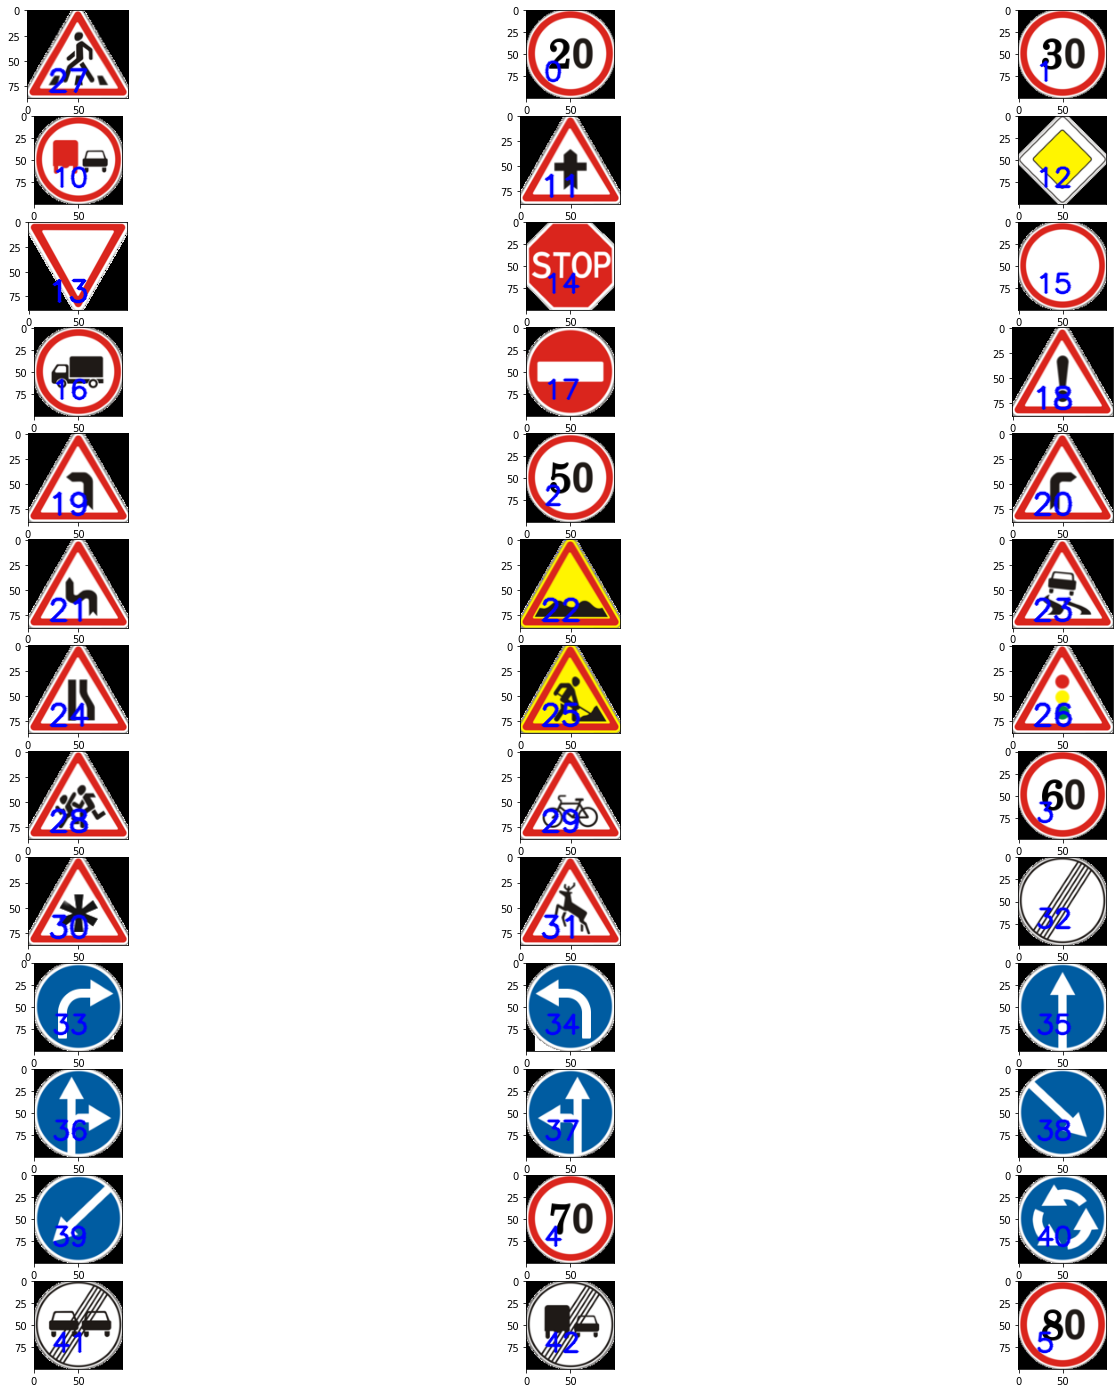

In [5]:
######Displaying Meta flder images with classID

Metaimages = []
for i ,row in meta_data.iterrows():
    path = main_folder +row['Path']
    classID = str(row['ClassId'])
    image = cv2.imread(path)
    font = cv2.FONT_HERSHEY_SIMPLEX
    org = (50, 50)
    fontScale = 1
    color = (255, 0, 0)
    thickness = 2
    image =cv2.putText(image,classID, (20,80), cv2.FONT_HERSHEY_SIMPLEX, fontScale, color, thickness, cv2.LINE_AA)
    Metaimages.append(image)

_, axs = plt.subplots(13, 3,figsize=(25, 25))
axs = axs.flatten()
for img, ax in zip(Metaimages, axs):
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
#Total number of categories

print('Total Number of Categories in this dataset {}'.format(len(meta_data['ClassId'].unique().tolist())))

Total Number of Categories in this dataset 43


# Reading Training Data

In [7]:
#Reading Training Data

Train_Data = pd.read_csv(train_csv)
Train_Data.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [8]:
print('Total Rows in Train dataset {}'.format(len(Train_Data)))

Total Rows in Train dataset 39209


# Reading Test Data

In [9]:
#Reading Test Data

Test_Data = pd.read_csv(test_csv)
Test_Data.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,test/00000.png
1,42,45,5,5,36,40,1,test/00001.png
2,48,52,6,6,43,47,38,test/00002.png
3,27,29,5,5,22,24,33,test/00003.png
4,60,57,5,5,55,52,11,test/00004.png


In [10]:
print('Total Rows in Test dataset {}'.format(len(Test_Data)))

Total Rows in Test dataset 12630


# Assigning Names to the classID

In [11]:
# Initilazing name for ClassID
Labels = {
             0: 'Speed limit (20km/h)',
             1: 'Speed limit (30km/h)',
             2: 'Speed limit (50km/h)',
             3: 'Speed limit (60km/h)',
             4: 'Speed limit (70km/h)',
             5: 'Speed limit (80km/h)',
             6: 'End of speed limit (80km/h)',
             7: 'Speed limit (100km/h)',
             8: 'Speed limit (120km/h)',
             9: 'No passing',
             10: 'No passing for vechiles over 3.5 metric tons',
             11: 'Right-of-way at the next intersection',
             12: 'Priority road',
             13: 'Yield',
             14: 'Stop',
             15: 'No vechiles',
             16: 'Vechiles over 3.5 metric tons prohibited',
             17: 'No entry',
             18: 'General caution',
             19: 'Dangerous curve to the left',
             20: 'Dangerous curve to the right',
             21: 'Double curve',
             22: 'Bumpy road',
             23: 'Slippery road',
             24: 'Road narrows on the right',
             25: 'Road work',
             26: 'Traffic signals',
             27: 'Pedestrians',
             28: 'Children crossing',
             29: 'Bicycles crossing',
             30: 'Beware of ice/snow',
             31: 'Wild animals crossing',
             32: 'End of all speed and passing limits',
             33: 'Turn right ahead',
             34: 'Turn left ahead',
             35: 'Ahead only',
             36: 'Go straight or right',
             37: 'Go straight or left',
             38: 'Keep right',
             39: 'Keep left',
             40: 'Roundabout mandatory',
             41: 'End of no passing',
             42: 'End of no passing by vechiles over 3.5 metric tons'
}

# Adding Labels Name into Train and Test Dataframes

In [12]:
Train_Data = Train_Data.sort_values('ClassId')


In [13]:
Temp_datafram = pd.DataFrame(Labels.items(), columns=['ClassId', 'Label'])
Temp_datafram.head(3)

,ClassId,Label
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)


# Adding Lables name column into Train dataframe

In [14]:
#Adding Lables name column into train dataframe
Train_Data = pd.merge(Train_Data, Temp_datafram, on="ClassId")


In [15]:
Train_Data.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path,Label
0,30,30,5,5,25,25,0,Train/0/00000_00002_00006.png,Speed limit (20km/h)
1,70,74,7,7,64,68,0,Train/0/00000_00004_00014.png,Speed limit (20km/h)
2,72,75,7,6,65,68,0,Train/0/00000_00004_00015.png,Speed limit (20km/h)
3,74,79,7,7,68,72,0,Train/0/00000_00004_00016.png,Speed limit (20km/h)
4,74,80,6,8,67,73,0,Train/0/00000_00004_00017.png,Speed limit (20km/h)


In [16]:
Train_Data.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path,Label
0,30,30,5,5,25,25,0,Train/0/00000_00002_00006.png,Speed limit (20km/h)
1,70,74,7,7,64,68,0,Train/0/00000_00004_00014.png,Speed limit (20km/h)
2,72,75,7,6,65,68,0,Train/0/00000_00004_00015.png,Speed limit (20km/h)
3,74,79,7,7,68,72,0,Train/0/00000_00004_00016.png,Speed limit (20km/h)
4,74,80,6,8,67,73,0,Train/0/00000_00004_00017.png,Speed limit (20km/h)


In [17]:
coun_Train = Train_Data[['Label','Path','ClassId']].groupby('Label')["ClassId"].count().reset_index(name="count_")
coun_Train_ = Train_Data[['Path','ClassId']].groupby('ClassId')["ClassId"].count().reset_index(name="count_")


# Adding Lables name column into test dataframe

In [18]:
#Adding Lables name column into test dataframe

Test__data = pd.merge(Test_Data, Temp_datafram, on="ClassId")

In [19]:
coun_Test = Test__data[['Label','Path','ClassId']].groupby('Label')["ClassId"].count().reset_index(name="count_")
coun_Test_ = Test__data[['Path','ClassId']].groupby('ClassId')["ClassId"].count().reset_index(name="count_")


# Bar charts for Training and Test Dataframe which shows us how many number of each classes in Train and Test

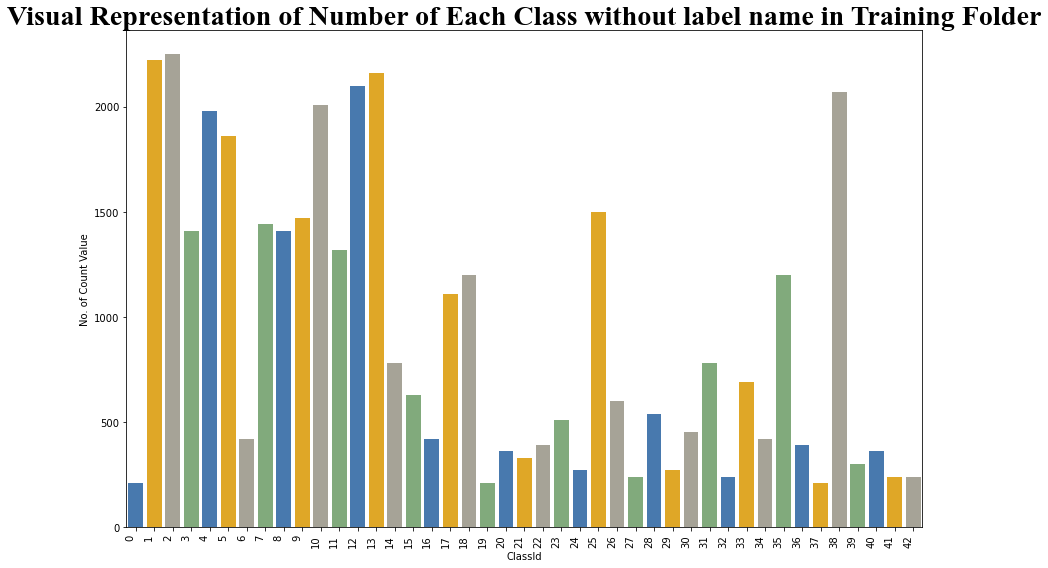

In [20]:
import seaborn
plt.figure(figsize=(12,8))
colors = ["windows blue", "amber", "greyish", "faded green"]
ax = seaborn.barplot(x=coun_Train_.ClassId, y=coun_Train_.count_,palette=seaborn.xkcd_palette(colors))
plt.ylabel("No. of Count Value")
ax.set_title('Visual Representation of Number of Each Class without label name in Training Folder', fontname="Times New Roman", size=28,fontweight="bold")
plt.xlabel("ClassId")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.tight_layout()
plt.show()

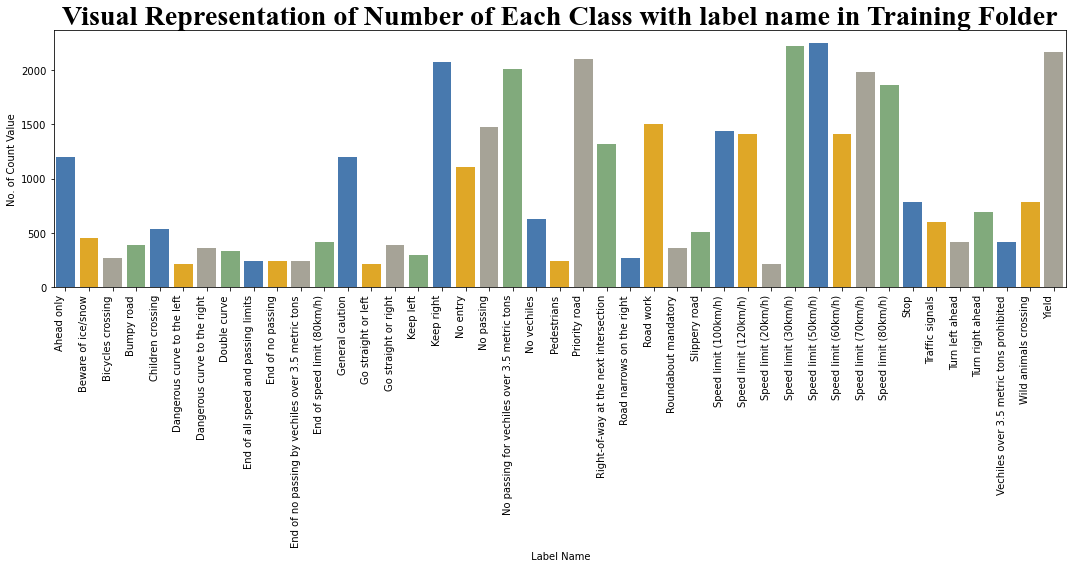

In [21]:
import seaborn
plt.figure(figsize=(15,8))
colors = ["windows blue", "amber", "greyish", "faded green"]
ax = seaborn.barplot(x=coun_Train.Label, y=coun_Train.count_,palette=seaborn.xkcd_palette(colors))
plt.ylabel("No. of Count Value")
ax.set_title('Visual Representation of Number of Each Class with label name in Training Folder', fontname="Times New Roman", size=28,fontweight="bold")
plt.xlabel(" Label Name")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.tight_layout()
plt.show()

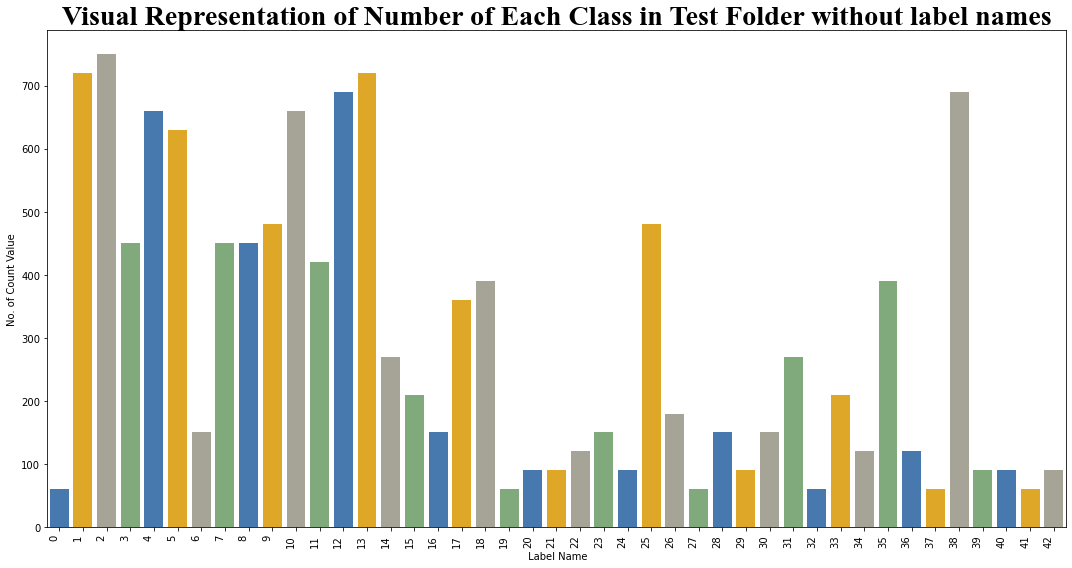

In [22]:
import seaborn
plt.figure(figsize=(15,8))
colors = ["windows blue", "amber", "greyish", "faded green"]
ax = seaborn.barplot(x=coun_Test_.ClassId, y=coun_Test_.count_,palette=seaborn.xkcd_palette(colors))
plt.ylabel("No. of Count Value")
ax.set_title('Visual Representation of Number of Each Class in Test Folder without label names', fontname="Times New Roman", size=28,fontweight="bold")
plt.xlabel(" Label Name")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.tight_layout()
plt.show()

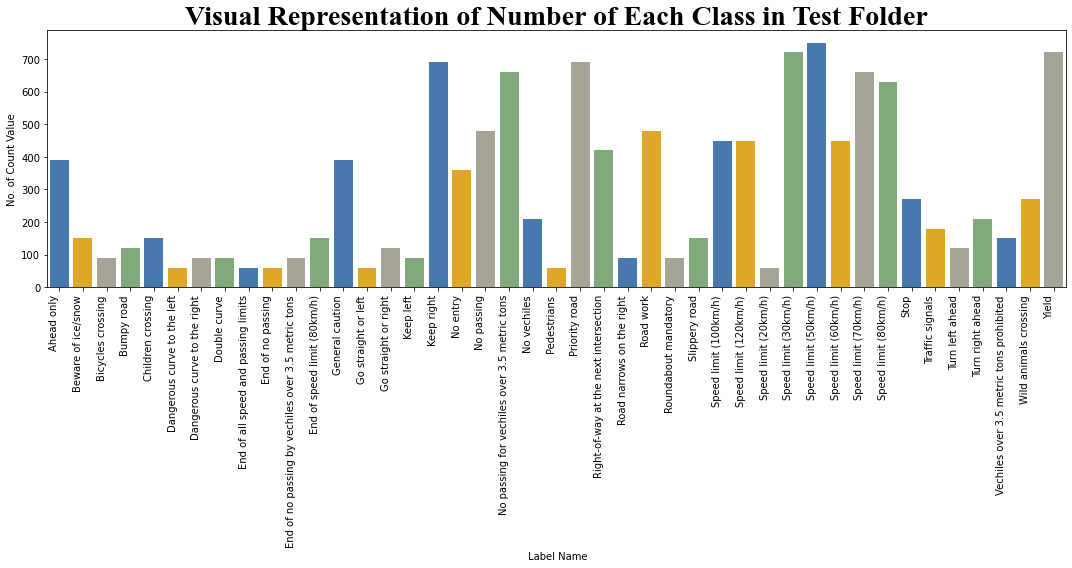

In [23]:
import seaborn
plt.figure(figsize=(15,8))
colors = ["windows blue", "amber", "greyish", "faded green"]
ax = seaborn.barplot(x=coun_Test.Label, y=coun_Test.count_,palette=seaborn.xkcd_palette(colors))
plt.ylabel("No. of Count Value")
ax.set_title('Visual Representation of Number of Each Class in Test Folder', fontname="Times New Roman", size=28,fontweight="bold")
plt.xlabel(" Label Name")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.tight_layout()
plt.show()

#  Max and Min number of classes in Train

In [24]:
display(coun_Train_.max())
display(coun_Train_.min())

ClassId      42
count_     2250
dtype: int64

ClassId      0
count_     210
dtype: int64

In [25]:
display(coun_Train.max())
display(coun_Train.min())

Label     Yield
count_     2250
dtype: object

Label     Ahead only
count_           210
dtype: object

#  Max and Min number of classes in Test

In [26]:
display(coun_Test.max())
display(coun_Test.min())

Label     Yield
count_      750
dtype: object

Label     Ahead only
count_            60
dtype: object

In [27]:
display(coun_Test_.max())
display(coun_Test_.min())

ClassId     42
count_     750
dtype: int64

ClassId     0
count_     60
dtype: int64

##  Visualizing 10 random images from Train data

/var/folders/jv/t35ykn454ms8nfbskc6kd4rw0000gn/T/ipykernel_76239/2485415631.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


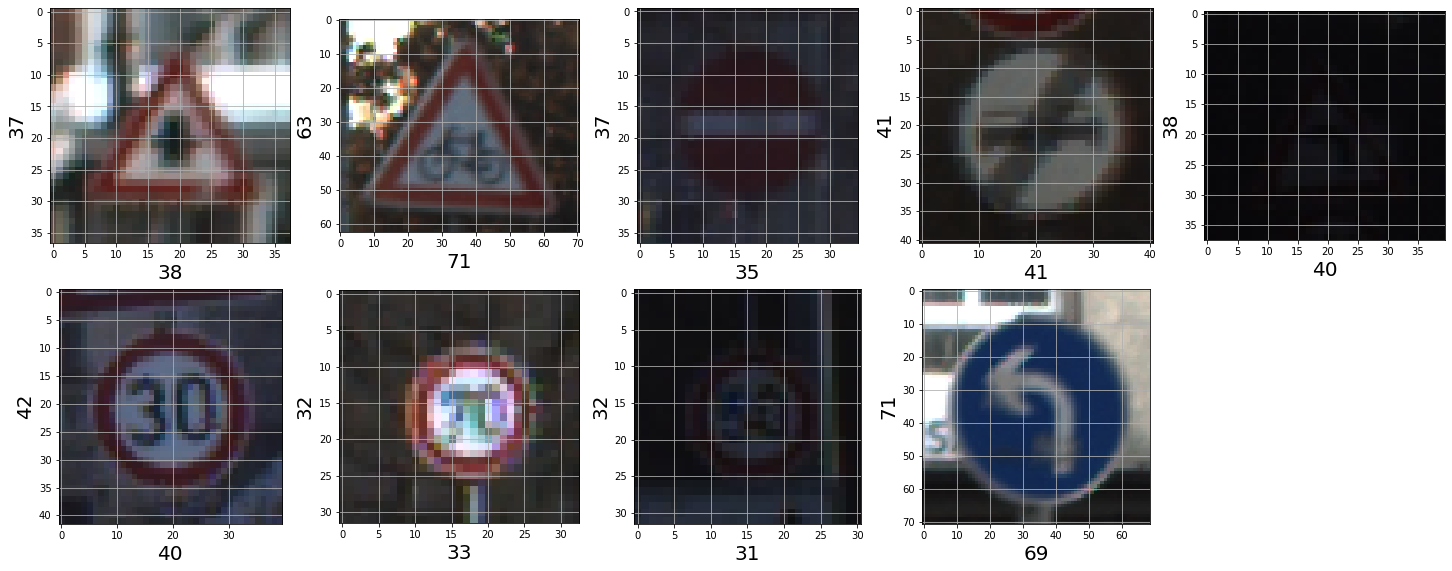

In [28]:
# Visualizing 10 random images from Train data
import random
from matplotlib.image import imread


imgs = Train_Data["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,10):
    plt.subplot(5,5,i)
    plt.grid(False)
    random_img_path = main_folder + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [29]:
Train_image_Path = Train_Data['Path'].unique().tolist()
len(Train_image_Path)

39209

# Visualizing 10 random images from Test data

/var/folders/jv/t35ykn454ms8nfbskc6kd4rw0000gn/T/ipykernel_76239/2395833921.py:15: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


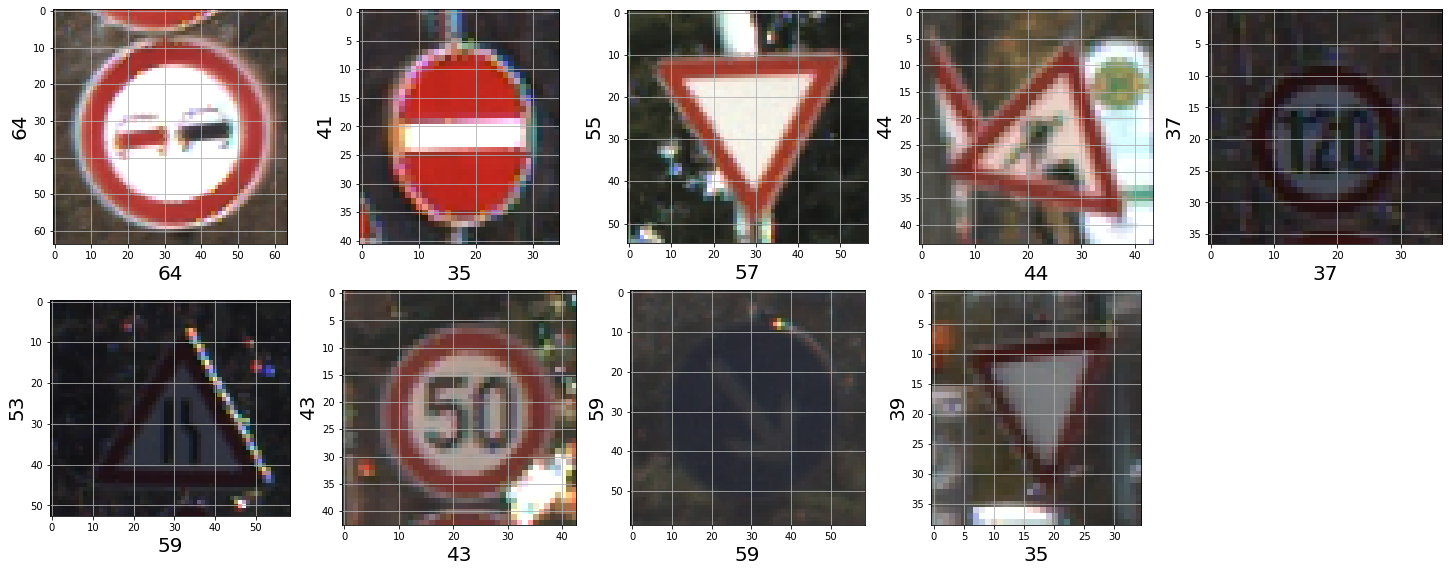

In [30]:
import random
from matplotlib.image import imread


imgs = Test_Data["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,10):
    plt.subplot(5,5,i)
    random_img_path = main_folder + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.grid(False)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [31]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['Total Train_Images', 'Tota Test_Images', 'Tota Meta_Images','Total Classes'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[coun_Test['count_'].sum(), # 1st column
                       coun_Train['count_'].sum(),meta_data['Path'].count(),43], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.update_layout(width=700, height=300)
fig.show()

In [32]:
df1 = coun_Test.rename(columns = {'Label':'Test_Label_Name', 'count_':'Test_Lable_Count'})
df2 = coun_Train.rename(columns = {'Label':'Train_Label_Name', 'count_':'Train_Lable_Count'})
final = pd.concat([df1, df2], axis=1)

In [33]:
final2 = pd.merge(final, Temp_datafram,how='left', left_on='Train_Label_Name', right_on='Label')

In [34]:
import plotly.graph_objects as go
import pandas as pd


fig = go.Figure(data=[go.Table(
    header=dict(values=list(['ClassId','Test Label Name','Test Lable Count','Train Label Name','Train Lable Count']),
                 line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[final2.ClassId,final2.Test_Label_Name, final2.Test_Lable_Count,final2.Train_Label_Name,final2.Train_Lable_Count],
               fill_color='lavender',
               align='left'))
])
fig.update_layout(
    title={
        'text': "<b>   Table To Show the number of Images of each class in Train and Test Folder</b>'",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

# Model Prepration 

In [35]:
train_group = Train_Data.groupby('ClassId')

In [36]:
image_data = []
image_labels = []
IMG_HEIGHT = 50
IMG_WIDTH = 50
channels = 3


def get_label_imageData(df):
    for i,row in df.iterrows():
        path = main_folder + row['Path']
        label = row['ClassId']

        try:
            image = cv2.imread(path)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(label)
            
        except:
            print("Error in " + img)

#         break
        

In [37]:
for i in train_group.groups.keys():
    
    
#     display(train_group.get_group(i))
    get_label_imageData(train_group.get_group(i))
#     break

# Changing the list to numpy array

In [38]:

image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 50, 50, 3) (39209,)


# Shuffle the images 
since it is good approch to over come overfitting of your model

In [39]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]


# Splitting The dataset into Test , Train

In [40]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 50, 50, 3)
X_valid.shape (11763, 50, 50, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [41]:
NUM_CATEGORIES = len(meta_data['ClassId'].unique().tolist())

In [42]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


# initiliaze the model

In [43]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

2022-06-07 21:51:28.373008: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 23, 23, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 128)         0

In [45]:
!pip install pydotplus

In [46]:
!pip install visualkeras

In [47]:
# from keras_visualizer import visualizer 
from keras.utils import plot_model
import visualkeras


# visual representation of Model

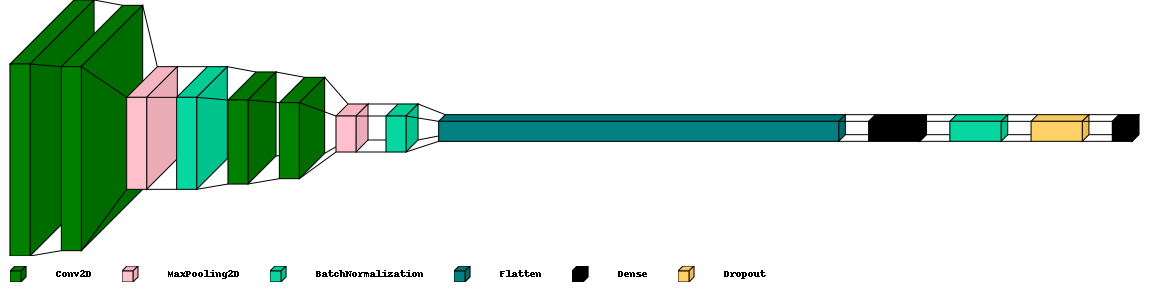

In [48]:
from collections import defaultdict
from tensorflow.keras import layers
color_map = defaultdict(dict)
color_map[layers.Conv2D]['fill'] = 'Green'
color_map[layers.MaxPooling2D]['fill'] = 'pink'
color_map[layers.Dense]['fill'] = 'black'
color_map[layers.Flatten]['fill'] = 'teal'
visualkeras.layered_view(model, legend=True,color_map=color_map, draw_volume=True,spacing=30)

In [49]:
Learning_rate = 0.001
epochs = 10

opt = Adam(lr=Learning_rate, decay=Learning_rate / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [50]:

history = model.fit(x = X_train, y = y_train, batch_size=32, epochs=epochs,validation_data=(X_val, y_val))

2022-06-07 21:51:34.872582: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/10
858/858 [==============================] - 85s 98ms/step - loss: 1.0612 - accuracy: 0.7558 - val_loss: 0.0580 - val_accuracy: 0.9841
Epoch 2/10
858/858 [==============================] - 80s 93ms/step - loss: 0.0248 - accuracy: 0.9939 - val_loss: 0.0487 - val_accuracy: 0.9854
Epoch 3/10
858/858 [==============================] - 80s 93ms/step - loss: 0.0135 - accuracy: 0.9965 - val_loss: 0.0434 - val_accuracy: 0.9885
Epoch 4/10
858/858 [==============================] - 81s 94ms/step - loss: 0.0109 - accuracy: 0.9971 - val_loss: 0.0157 - val_accuracy: 0.9960
Epoch 5/10
858/858 [==============================] - 81s 95ms/step - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.0275 - val_accuracy: 0.9931
Epoch 6/10
858/858 [==============================] - 82s 95ms/step - loss: 0.0141 - accuracy: 0.9953 - val_loss: 0.0241 - val_accuracy: 0.9940
Epoch 7/10
858/858 [==============================] - 83s 97ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0171 - val_accuracy:

In [51]:
scores = model.evaluate(X_val, y_val, verbose=0)


In [52]:
scores

[0.01212026085704565, 0.9965994954109192]

In [53]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

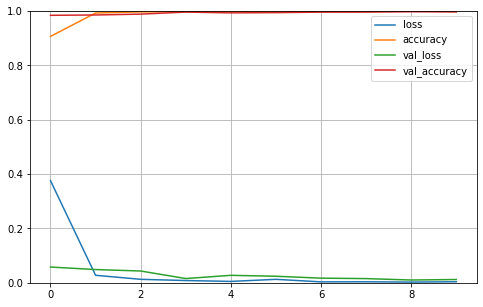

In [54]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [55]:
y_train.shape

(27446, 43)

# Test Model on New Images

In [56]:
test = pd.read_csv(main_folder + '/Test.csv')

labels = test["ClassId"].values
testimages = test["Path"].values

imagedata =[]

for img in testimages:
    try:
        image = cv2.imread(main_folder + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        imagedata.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(imagedata)
X_test = X_test/255

pred = np.argmax(model.predict(X_test), axis=1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

Test Data accuracy:  97.95724465558195


In [57]:
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

Test Data accuracy:  97.95724465558195


# Plot 10 predicted images and checking if this predicted class match with original classID 

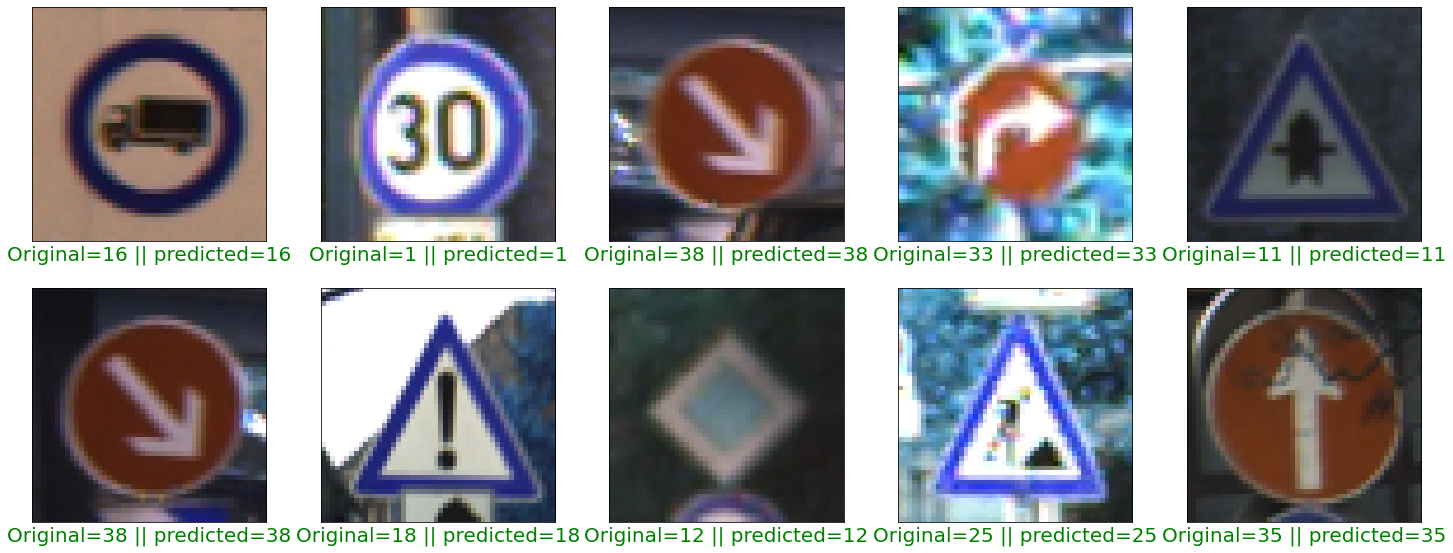

In [58]:
plt.figure(figsize = (25, 25))

indeex = 0
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    predictedd = pred[indeex + i]
    Original = labels[indeex + i]
    plt.xlabel('Original={} || predicted={}'.format(Original, predictedd), color = 'g',fontsize=20)
    plt.imshow(X_test[indeex + i])
#     plt.tight_layout()
plt.show()

# Metrics classification_report

In [59]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        60
           1       0.99      0.99      0.99       720
           2       0.98      1.00      0.99       750
           3       0.98      0.99      0.99       450
           4       0.98      0.99      0.98       660
           5       0.96      0.99      0.97       630
           6       1.00      0.76      0.86       150
           7       0.98      0.98      0.98       450
           8       0.97      0.94      0.96       450
           9       0.99      1.00      0.99       480
          10       1.00      0.99      1.00       660
          11       0.97      0.99      0.98       420
          12       1.00      0.98      0.99       690
          13       0.99      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.97      0.99      0.98       210
          16       1.00      0.99      0.99       150
          17       1.00    

In [60]:
model.save('cnn_model.h5')